### Load according data

In [27]:
import pandas as pd
import oemof.solph as solph
from co2_emissions import get_co2_emissions
import yaml
# load config
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)


#restore and load energy system
energy_system = solph.EnergySystem()
energy_system.restore('C:\\Users\\ann82611\\ownCloud\\U-Platte\\04_Code\\hydrogen_hub\\h2_hub_minimalschnitt\\h2_hub_dumps', 'h2_hub_dump_1.oemof')

results_main = energy_system.results['main']
results_meta = energy_system.results['meta'] #for costs

# Convert the results to a DataFrame
results = pd.Series(results_main)
results_meta_pd = pd.Series(results_meta)
print(results.info())
#print(results.describe())


<class 'pandas.core.series.Series'>
MultiIndex: 15 entries, ("<oemof.solph.buses._bus.Bus: 'co2_emissions_bus'>", "<oemof.solph.components._sink.Sink: 'co2_emissions'>") to ("<oemof.solph.components._source.Source: 'wind'>", "<oemof.solph.buses._bus.Bus: 'electricity'>")
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
15 non-null     object
dtypes: object(1)
memory usage: 934.0+ bytes
None


## System Performance
The system performance is defined per below consisting of:
* Electricity deliverd to steel mill
* Hydrogen deliverd to steel mill
* Steel produced
* Co2 Emissions
* Costs #aufsummierte kosten

Please keep in mind that the definition of the system performance may vary over time and also to the considered system accordingly.

In [28]:
#Schlüssel sind objekte (keine Strings!) 

# get df flows 
flow_el_steel = results.loc[(energy_system.node['electricity'], energy_system.node['steel_mill'])]['sequences']
flow_h2_steel = results.loc[(energy_system.node['h2_bus'],  energy_system.node['steel_mill'])]['sequences']
flow_co2 = get_co2_emissions(energy_system, config)
steel_produced = results.loc[(energy_system.node['steel_mill'],  energy_system.node['steel'])]['sequences']
operating_costs = results_meta_pd['objective']
print(f"Operating Costs: {operating_costs}")

#extract values from df flows
flow_el_steel_values = flow_el_steel['flow']
flow_h2_steel_values = flow_h2_steel['flow']
flow_co2_values = flow_co2['flow']
steel_produced_values = steel_produced['flow']
operating_costs_values = [operating_costs] * (len(flow_el_steel_values))

# Turn into combined DataFrame
system_performance = pd.DataFrame({'flow_co2': flow_co2_values, 'flow_el_steel': flow_el_steel_values, 'flow_h2_steel': flow_h2_steel_values, 'steel_produced': steel_produced_values, 'operating_costs': operating_costs_values})
system_performance['operating_costs'] = system_performance['operating_costs'].abs() *10e-4 # 10e-4 € für Tabellen lesbarkeit absolute value for a positive value of operating costs (negative costs implemented meaning revenue)

# print(f"Operating costs: {system_performance['operating_costs'].head()}")
# print(f"Produced steel Sum: {system_performance['steel_produced'].sum}")
print(system_performance.describe())
print(system_performance.head())


Operating Costs: -2863504.044749004
          flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
count  8760.000000   8.760000e+03         8760.0    8.760000e+03   
mean     55.557988   6.695969e+01         1800.0    4.380000e+01   
std      16.665194   1.421167e-14            0.0    7.105833e-15   
min       5.264909   6.695969e+01         1800.0    4.380000e+01   
25%      45.348056   6.695969e+01         1800.0    4.380000e+01   
50%      53.774118   6.695969e+01         1800.0    4.380000e+01   
75%      68.827016   6.695969e+01         1800.0    4.380000e+01   
max      83.479845   6.695969e+01         1800.0    4.380000e+01   

       operating_costs  
count     8.761000e+03  
mean      2.863504e+03  
std       4.547733e-13  
min       2.863504e+03  
25%       2.863504e+03  
50%       2.863504e+03  
75%       2.863504e+03  
max       2.863504e+03  
                      flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
2019-01-01 00:00:00  49.483318      66.959689 

c:\Users\ann82611\AppData\Local\Programs\Python\Python312\Lib\site-packages\oemof\network\energy_system.py:205: ExperimentalFeatureWarning: The API to access nodes by label is experimental and might change without prior notice.
  warnings.warn(msg, debugging.ExperimentalFeatureWarning)
c:\Users\ann82611\AppData\Local\Programs\Python\Python312\Lib\site-packages\oemof\network\energy_system.py:205: ExperimentalFeatureWarning: The API to access nodes by label is experimental and might change without prior notice.
  warnings.warn(msg, debugging.ExperimentalFeatureWarning)


### Plot System Performance

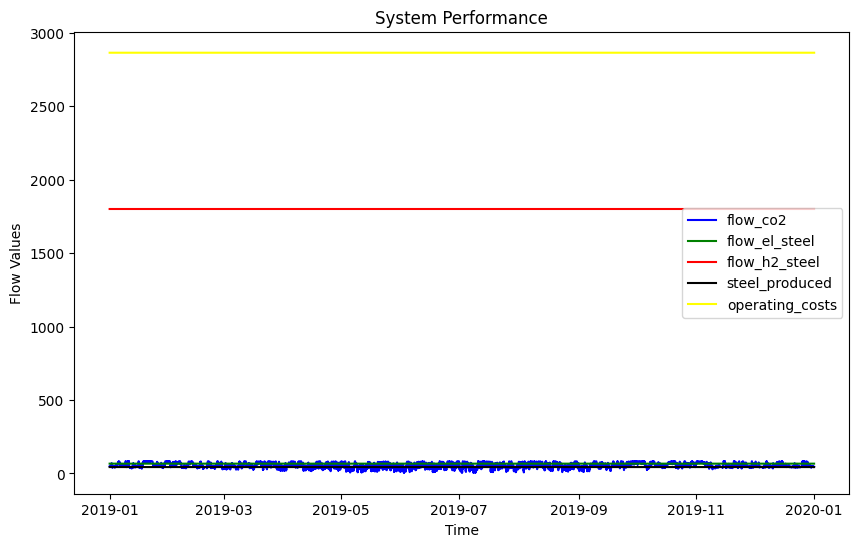

In [29]:
import matplotlib.pyplot as plt

# Erstelle eine Figur und eine Achse
plt.figure(figsize=(10, 6))

# Plotte die drei Zeitreihen
plt.plot(system_performance.index, system_performance['flow_co2'], label='flow_co2', color='blue')
plt.plot(system_performance.index, system_performance['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(system_performance.index, system_performance['flow_h2_steel'], label='flow_h2_steel', color='red')
plt.plot(system_performance.index, system_performance['steel_produced'], label='steel_produced', color='black')
plt.plot(system_performance.index, system_performance['operating_costs'], label='operating_costs', color='yellow')

# Füge Titel und Beschriftungen hinzu
plt.title('System Performance')
plt.xlabel('Time')
plt.ylabel('Flow Values')

# Füge eine Legende hinzu
plt.legend()

# Zeige die Abbildung an
plt.show()

          flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
count  8760.000000         8761.0         8761.0          8761.0   
mean      0.643011            1.0            1.0             1.0   
std       0.213069            0.0            0.0             0.0   
min       0.000000            1.0            1.0             1.0   
25%       0.512474            1.0            1.0             1.0   
50%       0.620204            1.0            1.0             1.0   
75%       0.812659            1.0            1.0             1.0   
max       1.000000            1.0            1.0             1.0   

       operating_costs  
count           8761.0  
mean               1.0  
std                0.0  
min                1.0  
25%                1.0  
50%                1.0  
75%                1.0  
max                1.0  
                     flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
2019-01-01 00:00:00  0.565345              1              1               1   
2019

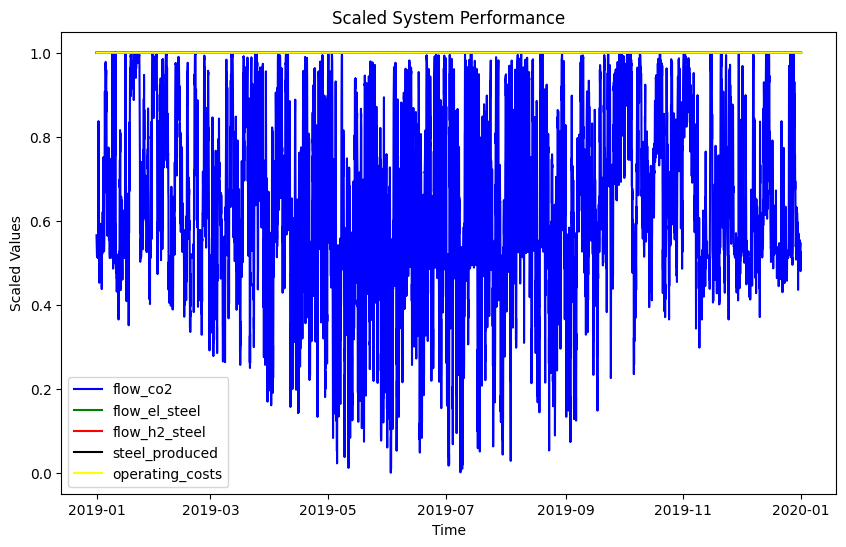

In [30]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# normalized values of system performance
system_performance['flow_co2'] = scaler.fit_transform(system_performance[['flow_co2']])
constant_colums = ['flow_el_steel', 'flow_h2_steel', 'steel_produced', 'operating_costs']
system_performance[constant_colums] = 1


# create new df with normalized values
#system_performance_normed = pd.DataFrame(system_performance_normed_values, columns=system_performance.columns, index=system_performance.index)

print(system_performance.describe())
print(system_performance.head())

# Plotten der normierten Werte
plt.figure(figsize=(10, 6))
plt.plot(system_performance.index, system_performance['flow_co2'], label='flow_co2', color='blue')
plt.plot(system_performance.index, system_performance['flow_el_steel'], label='flow_el_steel', color='green')
plt.plot(system_performance.index, system_performance['flow_h2_steel'], label='flow_h2_steel', color='red')
plt.plot(system_performance.index, system_performance['steel_produced'], label='steel_produced', color='black')
plt.plot(system_performance.index, system_performance['operating_costs'], label='operating_costs', color='yellow')

# Titel und Beschriftungen
plt.title('Scaled System Performance')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.legend()

plt.show()


### Combine System Performance into one Indicator

Sum weights: 5
                      flow_co2  flow_el_steel  flow_h2_steel  steel_produced  \
2019-01-01 00:00:00  56.534482            100            100             100   
2019-01-01 01:00:00  55.645612            100            100             100   
2019-01-01 02:00:00  55.241384            100            100             100   
2019-01-01 03:00:00  53.239681            100            100             100   
2019-01-01 04:00:00  52.037625            100            100             100   
...                        ...            ...            ...             ...   
2019-03-20 03:00:00  97.787782            100            100             100   
2019-03-20 04:00:00  98.301354            100            100             100   
2019-03-20 05:00:00  98.844664            100            100             100   
2019-03-20 06:00:00  96.483894            100            100             100   
2019-03-20 07:00:00  97.761451            100            100             100   

                     ope

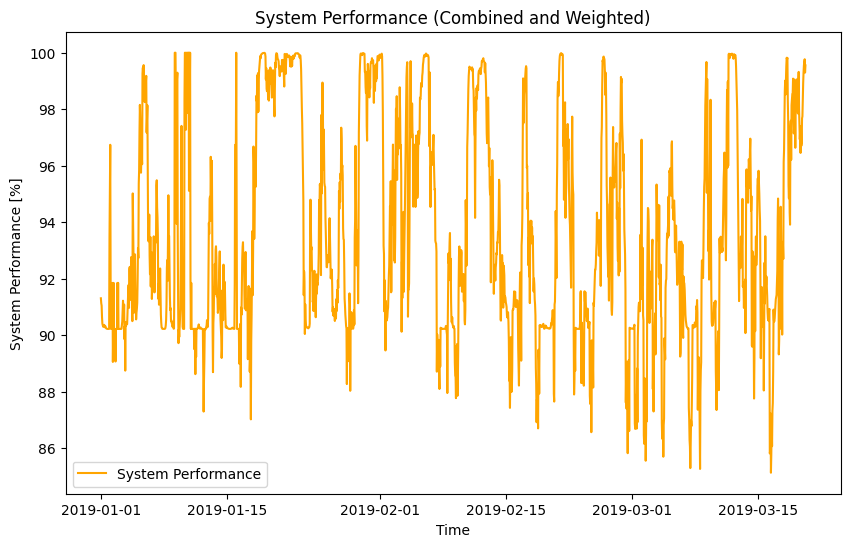

In [31]:
# define weights of each flow
weight_share_flow_co2 = 1
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 1

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance['weighted_system_performance_combined'] = (
    system_performance['flow_co2'] * weight_flow_co2 +
    system_performance['flow_el_steel'] * weight_flow_el_steel +
    system_performance['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance['steel_produced'] * weight_steel_produced +
    system_performance['operating_costs'] * weight_operating_costs
)
system_performance_normed = system_performance * 100 #to display in percent
system_performance_normed_cut = system_performance_normed.head(1880)
print(system_performance_normed_cut)
# print(system_performance['weighted_combined'].head())
# print(system_performance_normed.head(100))

plt.figure(figsize=(10, 6))
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['weighted_system_performance_combined'], label='System Performance', color='orange', linestyle='-')

# Titel und Achsenbeschriftungen
plt.title('System Performance (Combined and Weighted)')
plt.xlabel('Time')
plt.ylabel('System Performance [%]')

# Zeige die Grafik an
plt.legend()
plt.show()


### Calculate one single, comparable Value for System Performance 

In [32]:
total_weighted_combined = system_performance_normed['weighted_system_performance_combined'].sum()

print(f"System Performance: {total_weighted_combined}")


System Performance: 813455.5606263971


### Plots for Poster an Presentation (System Performance)

Sum weights: 5


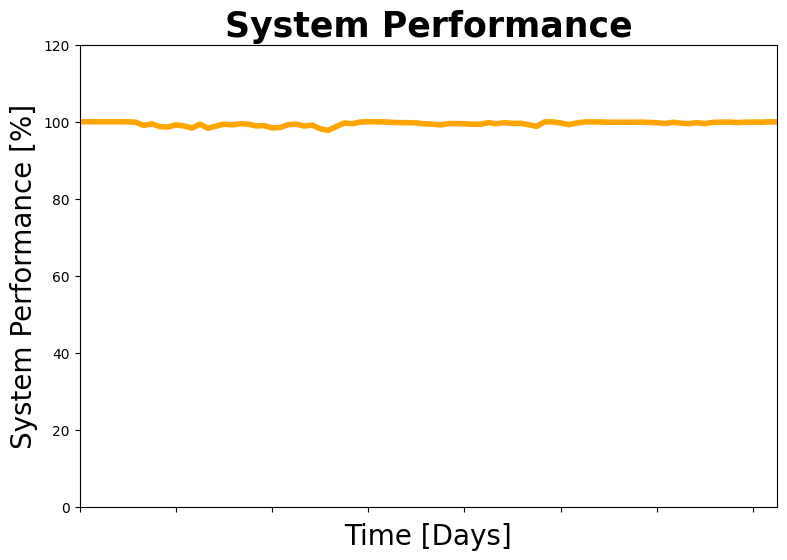

In [100]:
# define weights of each flow
weight_share_flow_co2 = 1
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 1

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance['weighted_system_performance_combined'] = (
    system_performance['flow_co2'] * weight_flow_co2 +
    system_performance['flow_el_steel'] * weight_flow_el_steel +
    system_performance['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance['steel_produced'] * weight_steel_produced +
    system_performance['operating_costs'] * weight_operating_costs
)

start = 432
end = 520

system_performance_normed = system_performance * 100 #to display in percent
system_performance_normed_cut = system_performance_normed.iloc[start:end]
#print(system_performance_normed_cut)
# print(system_performance['weighted_combined'].head())
# print(system_performance_normed.head(100))

plt.figure(figsize=(9, 6))
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['weighted_system_performance_combined'], label='System Performance', color='orange', linestyle='-', lw= 4)

plt.ylim(0,120)



# Setze die X-Achsen-Grenzen, um den Graphen linksbündig zu verschieben
plt.xlim(system_performance_normed_cut.index[0], system_performance_normed_cut.index[-1])

# Set x-ticks to show only lines without labels
tick_indices = system_performance_normed_cut.index[::12]  # Jeder 12. Index
plt.xticks(ticks=tick_indices, labels=[])  # Anzeigen der Daten mit 45 Grad Rotation
# Titel und Achsenbeschriftungen
plt.title('System Performance', fontweight='bold', fontsize= 25)
plt.xlabel('Time [Days]', fontsize= 20)
plt.ylabel('System Performance [%]', fontsize=20)

# Zeige die Grafik an
# plt.legend()
plt.show()


## System performance disruption plot

Sum weights: 9


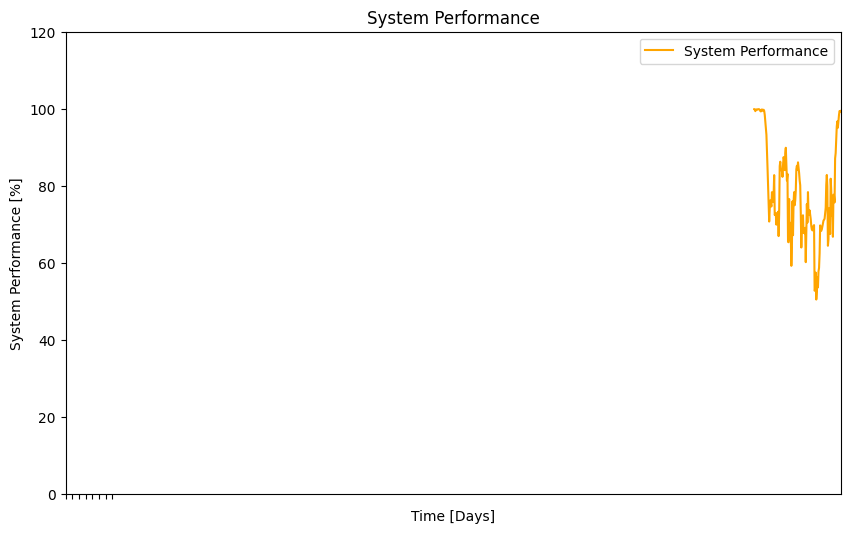

In [34]:
# define weights of each flow
weight_share_flow_co2 = 6
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 0

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance['weighted_system_performance_combined'] = (
    system_performance['flow_co2'] * weight_flow_co2 +
    system_performance['flow_el_steel'] * weight_flow_el_steel +
    system_performance['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance['steel_produced'] * weight_steel_produced +
    system_performance['operating_costs'] * weight_operating_costs
)

start = 1675
end = 1832

system_performance_normed = system_performance * 100 #to display in percent
system_performance_normed_cut = system_performance_normed.iloc[start:end]
#print(system_performance_normed_cut)
# print(system_performance['weighted_combined'].head())
# print(system_performance_normed.head(100))

plt.figure(figsize=(10, 6))
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['weighted_system_performance_combined'], label='System Performance', color='orange', linestyle='-')

plt.ylim(0,120)

# Setze die X-Achsen-Grenzen, um den Graphen linksbündig zu verschieben
plt.xlim(system_performance_normed_cut.index[0], system_performance_normed_cut.index[-1])

# #Set x-ticks to show only lines without labels
plt.xticks(ticks=tick_indices, labels=['']*len(tick_indices))
# plt.xticks(ticks=tick_indices, labels=[])  # Anzeigen der Daten mit 45 Grad Rotation
# Titel und Achsenbeschriftungen
plt.title('System Performance')
plt.xlabel('Time [Days]')
plt.ylabel('System Performance [%]')

# Zeige die Grafik an
plt.legend()
plt.show()

### Smooth and Plot Data

Sum weights: 7


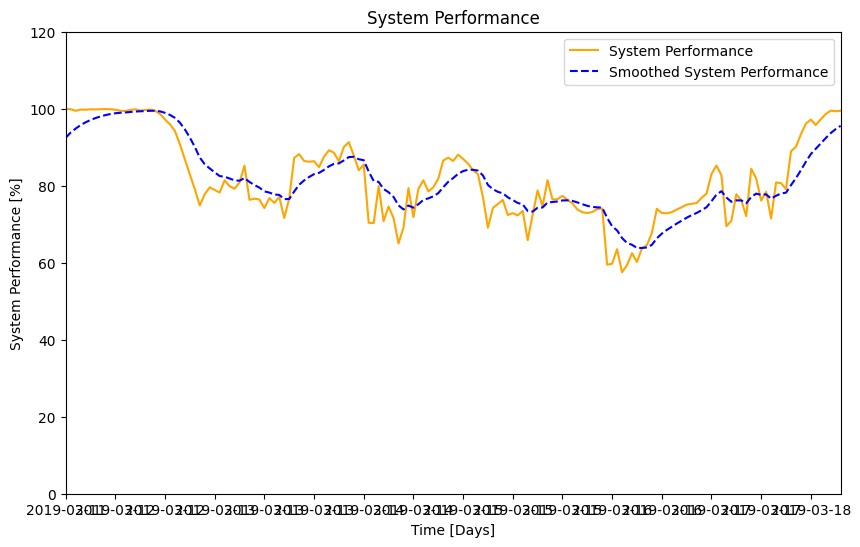

In [35]:
# define weights of each flow
weight_share_flow_co2 = 4
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 0

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance['weighted_system_performance_combined'] = (
    system_performance['flow_co2'] * weight_flow_co2 +
    system_performance['flow_el_steel'] * weight_flow_el_steel +
    system_performance['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance['steel_produced'] * weight_steel_produced +
    system_performance['operating_costs'] * weight_operating_costs
)

system_performance['smoothed'] = system_performance['weighted_system_performance_combined'].ewm(span=10, adjust=False).mean()

start = 1675
end = 1832

system_performance_normed = system_performance * 100 #to display in percent
system_performance_normed_cut = system_performance_normed.iloc[start:end]


plt.figure(figsize=(10, 6))
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['weighted_system_performance_combined'], label='System Performance', color='orange', linestyle='-')
# Plot der geglätteten Werte
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['smoothed'], label='Smoothed System Performance', color='blue', linestyle='--')
plt.ylim(0,120)

# Setze die X-Achsen-Grenzen, um den Graphen linksbündig zu verschieben
plt.xlim(system_performance_normed_cut.index[0], system_performance_normed_cut.index[-1])

# #Set x-ticks to show only lines without labels
tick_indices = system_performance_normed_cut.index[::10]  # Show every 10th tick or adjust as necessary
plt.xticks(ticks=tick_indices)

# plt.xticks(ticks=tick_indices, labels=[])  # Anzeigen der Daten mit 45 Grad Rotation
# Titel und Achsenbeschriftungen
plt.title('System Performance')
plt.xlabel('Time [Days]')
plt.ylabel('System Performance [%]')

# Zeige die Grafik an
plt.legend()
plt.show()

In [36]:
import pandas as pd
import numpy as np

# Anzahl der Einträge
num_entries = 8760

# Erstellen eines DataFrames mit zufälligen Werten zwischen 99 und 100
random_values = np.random.uniform(99, 100, num_entries)

# DataFrame erstellen
df = pd.DataFrame({'random_values': random_values})

# Ausgabe der ersten paar Zeilen zur Überprüfung
print(df.head())
print(df.describe())


   random_values
0      99.536052
1      99.327643
2      99.068745
3      99.619517
4      99.692169
       random_values
count    8760.000000
mean       99.501956
std         0.285319
min        99.000120
25%        99.260556
50%        99.497215
75%        99.744488
max        99.999703


Sum weights: 9
RangeIndex(start=0, stop=8861, step=1)


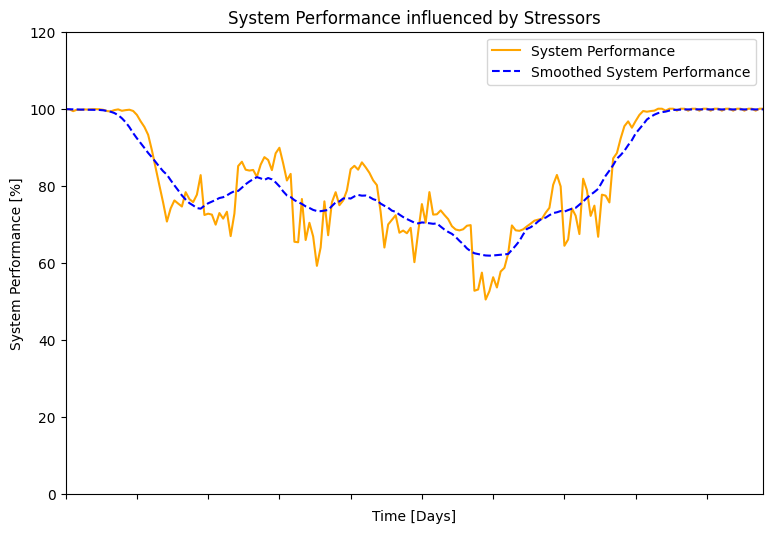

In [86]:
from scipy.signal import savgol_filter
# define weights of each flow
weight_share_flow_co2 = 6
weight_share_flow_el_steel = 1
weight_share_flow_h2_steel = 1
weight_share_steel_produced = 1
weight_share_operating_costs = 0

sum_weights = weight_share_flow_co2 + weight_share_flow_el_steel + weight_share_flow_h2_steel + weight_share_steel_produced + weight_share_operating_costs
print(f"Sum weights: {sum_weights}")

#calculate weights
weight_flow_co2 = weight_share_flow_co2 / sum_weights
weight_flow_el_steel = weight_share_flow_el_steel / sum_weights
weight_flow_h2_steel = weight_share_flow_h2_steel / sum_weights
weight_steel_produced = weight_share_steel_produced / sum_weights
weight_operating_costs = weight_share_operating_costs / sum_weights

#weight dictionary
weights = {'flow_co2': weight_flow_co2, 'flow_el_steel': weight_flow_el_steel, 'flow_h2_steel': weight_flow_h2_steel, 'steel_produced': weight_steel_produced, 'operating_costs': weight_operating_costs}

# add weighted system performance to system performance df
system_performance['weighted_system_performance_combined'] = (
    system_performance['flow_co2'] * weight_flow_co2 +
    system_performance['flow_el_steel'] * weight_flow_el_steel +
    system_performance['flow_h2_steel'] * weight_flow_h2_steel +
    system_performance['steel_produced'] * weight_steel_produced +
    system_performance['operating_costs'] * weight_operating_costs
)



start = 1675
end = 1862
system_performance = system_performance.reset_index(drop=True)


print(system_performance.index)

for i in range(1660,1675):
    system_performance.loc[i, 'weighted_system_performance_combined'] = 1
    
# Setze 100 Zeilen ab Zeile 1832 auf 1
for i in range(1832, 1932):
    # Setze jeden dritten Wert auf 99,5
    if (i - 1832) % 3 == 0:
        system_performance.loc[i, 'weighted_system_performance_combined'] = 0.995
    # Setze jeden sechsten Wert auf 99,8
    elif (i - 1832) % 6 == 0:
        system_performance.loc[i, 'weighted_system_performance_combined'] = 0.998
    # Alle anderen Werte auf 1 setzen
    else:
        system_performance.loc[i, 'weighted_system_performance_combined'] = 1


system_performance['smoothed'] = savgol_filter(system_performance['weighted_system_performance_combined'], window_length=19, polyorder=1)    
system_performance_normed = system_performance * 100 #to display in percent

system_performance_normed_cut = system_performance_normed.iloc[start:end]
plt.figure(figsize=(9, 6))
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['weighted_system_performance_combined'], label='System Performance', color='orange', linestyle='-')
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['smoothed'], label='Smoothed System Performance', color='blue', linestyle='--')
plt.ylim(0,120)
plt.xlim(system_performance_normed_cut.index[0], system_performance_normed_cut.index[-1])
tick_indices = system_performance_normed_cut.index[::19]  # Jeder 12. Index
plt.xticks(ticks=tick_indices, labels=[])  # Anzeigen der Daten mit 45 Grad Rotation
plt.title('System Performance influenced by Stressors')
plt.xlabel('Time [Days]')
plt.ylabel('System Performance [%]')
plt.legend()
# plt.grid()
plt.show()

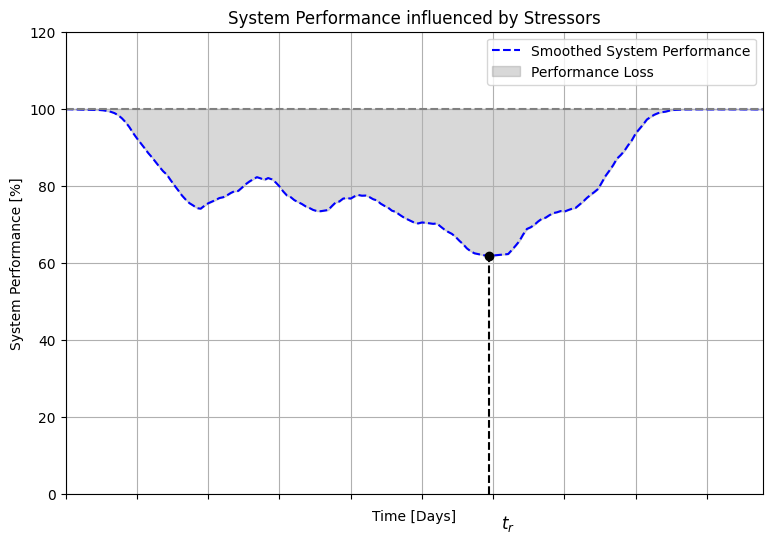

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Finde den minimalen Wert und den Index in der geglätteten System-Performance
min_value = system_performance_normed_cut['smoothed'].min()
min_index = system_performance_normed_cut['smoothed'].idxmin()

# Plot
plt.figure(figsize=(9, 6))

# Zeichne die geglättete System-Performance
plt.plot(system_performance_normed_cut.index, system_performance_normed_cut['smoothed'], label='Smoothed System Performance', color='blue', linestyle='--')

# Markiere den tiefsten Punkt mit einem schwarzen Punkt
plt.plot(min_index, min_value, 'ko')  # 'ko' steht für schwarzen Punkt

# Zeichne eine gestrichelte Linie vom tiefsten Punkt zur X-Achse
plt.plot([min_index, min_index], [0, min_value], 'k--')  # 'k--' steht für schwarze gestrichelte Linie

# Füge den x-Achsenabschnitt mit dem Label 't_r' hinzu
plt.annotate(r'$t_r$', xy=(min_index, 0), xytext=(min_index+5, -5), fontsize=12, color='black', ha='center', va='top')

# Gestrichelte graue Linie bei y=100
plt.axhline(y=100, color='gray', linestyle='--')

# Schraffiere die Fläche zwischen der geglätteten System-Performance und y=100
plt.fill_between(system_performance_normed_cut.index, system_performance_normed_cut['smoothed'], 100, 
                 where=(system_performance_normed_cut['smoothed'] < 100), color='gray', alpha=0.3, label='Performance Loss')

# Setze die Achsenlimits
plt.ylim(0, 120)
plt.xlim(system_performance_normed_cut.index[0], system_performance_normed_cut.index[-1])

# Setze die X-Ticks
tick_indices = system_performance_normed_cut.index[::19]
plt.xticks(ticks=tick_indices, labels=[])

# Titel und Achsenbeschriftungen
plt.title('System Performance influenced by Stressors')
plt.xlabel('Time [Days]')
plt.ylabel('System Performance [%]')

# Legende und Raster anzeigen
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()


## random

In [39]:
import pandas as pd
import numpy as np

# Anzahl der Einträge
num_entries = 8760

# Erstellen eines DataFrames mit zufälligen Werten zwischen 99 und 100
random_values = np.random.uniform(99, 100, num_entries)

# DataFrame erstellen
df = pd.DataFrame({'random_values': random_values})

# Ausgabe der ersten paar Zeilen zur Überprüfung
print(df.head())


   random_values
0      99.659381
1      99.035110
2      99.589973
3      99.210948
4      99.692879
